## Esempio di Classificatore con SVM non lineare

Import librerie necessarie

In [1]:
import pandas as pd
import sklearn.datasets as ds
import numpy as np
import sklearn.svm as svm
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Lettura del datset

In [2]:
dataset_vortex  = pd.read_csv("vortex.csv")
dataset_vortex.head()

,x,y,class
0,0.959137,1.129603,0
1,-2.091875,0.345846,1
2,-1.310553,5.262371,0
3,0.955036,6.874431,1
4,0.672481,-0.598561,1


Suddividiamo i dati in in due porzioni: una per addestrare il modello, una per testare le sue performance.

In [3]:
X = dataset_vortex.drop("class", axis=1)
y =dataset_vortex["class"]
X_train, X_test, y_train, y_test = ms.train_test_split(X,y, test_size=0.25, random_state = 10)

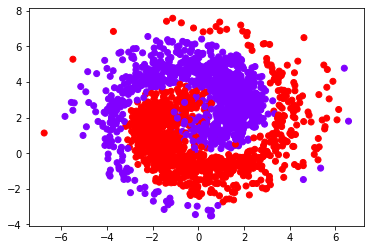

In [4]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='rainbow')

Addestriamo il modello SVM utilizzando i dati selezionati per il train.

In [5]:
classifier = svm.SVC(kernel='rbf', probability=True)
classifier.fit(X=X_train, y=y_train)

SVC(probability=True)

Valutiamo il risultato e le performance

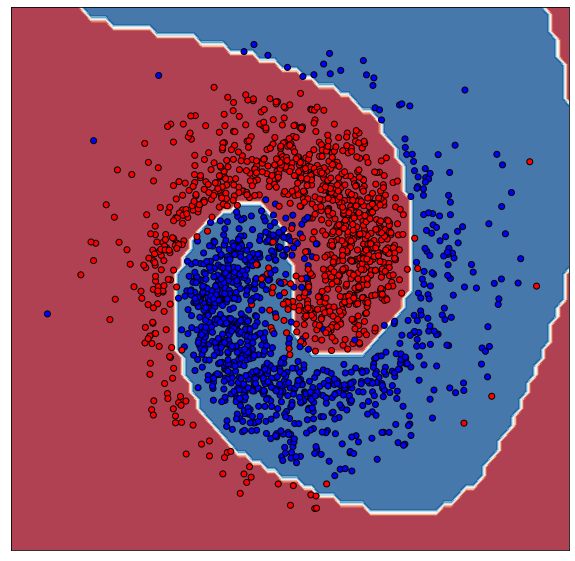

In [6]:
from matplotlib.colors import ListedColormap

clf = classifier
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h= 0.2
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))


plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cm_bright,edgecolors='k' )
#plt.xlabel('x')
#plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
#plt.title(titles[i])
plt.show()

Proviamo ad assegnare dei nuovi punti e verificare le come il modello li classifica

In [7]:
classifier.predict([[-2,1],[2,4]])

array([1, 0], dtype=int64)

Calcoliamo la matrice di confusione per verificare le performance calcolando la prediction di tutto il test set

In [8]:
pred = classifier.predict(X_test)
pred = pd.DataFrame(pred)
pred.index = y_test.index
y_test = pd.DataFrame(y_test)
pred.columns = ["pred"]
pred_test = pd.concat([pred, y_test], axis=1)
confusion_matrix(y_test, pred)

array([[232,   4],
       [  8, 256]], dtype=int64)

da cui segue il calcolo dell'accuratezza:

In [9]:
accuracy_score(y_test, pred)

0.976